# Binary Classification 
##### Indeed using Jupyter Notebook; For better visualization


In [859]:
# Importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score,roc_curve,auc
import xgboost as xgb

pd.set_option('display.max_columns',100)
pd.set_option('display.max_row',10000)



# read dataset as dataframe 

In [860]:
df=pd.read_csv('binary_classifier_data/training.csv',delimiter=';')
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [861]:
df.shape

(3700, 19)

In [862]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [863]:
df.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [864]:
df['variable2']=df['variable2'].str.replace(',','.')
df['variable3']=df['variable3'].str.replace(',','.')
df['variable8']=df['variable8'].str.replace(',','.')


In [865]:
df['variable2']=df['variable2'].astype('float64')
df['variable3']=df['variable3'].astype('float64')
df['variable8']=df['variable8'].astype('float64')

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null float64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 549.3+ KB


[]

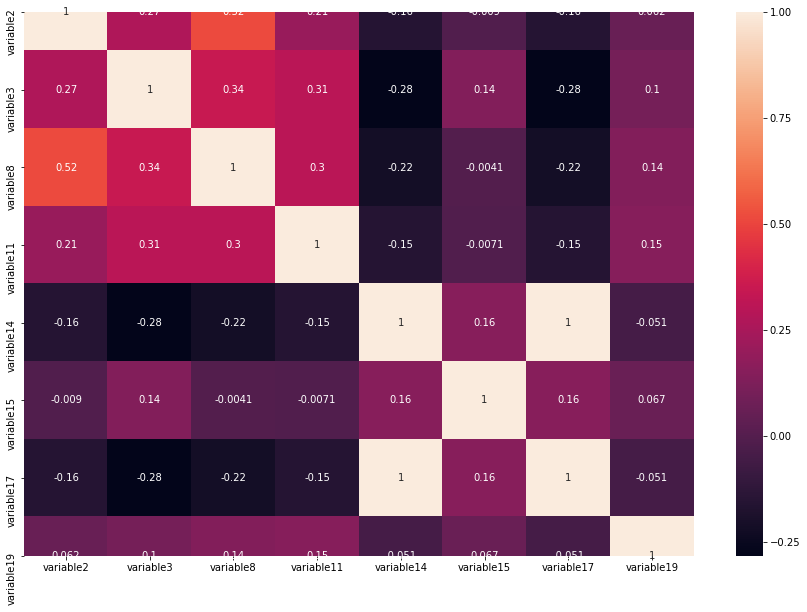

In [867]:
#plotting correlation matrix of our data features, to understabd it more
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(columns=['classLabel']).corr(),annot=True)
plt.plot()

In [868]:
df.classLabel.value_counts()
#showing that our data is not balanced 

yes.    3424
no.      276
Name: classLabel, dtype: int64

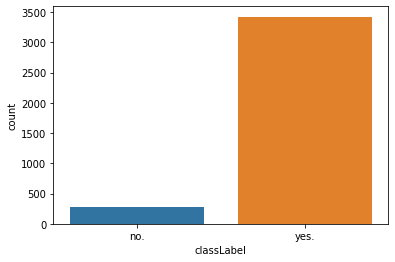

In [869]:
sns.countplot(x='classLabel',data=df)
#The records of 'no.'class is so much smaller in size than that of 'Yes' class

# check for Missing Values In Train Data & Deal With it

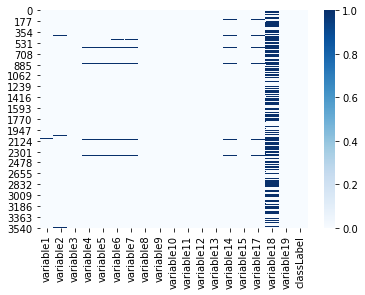

In [870]:
sns.heatmap(df.isnull(),cmap='Blues')

In [871]:
df.isnull().sum()

variable1       39
variable2       39
variable3        0
variable4       64
variable5       64
variable6       66
variable7       66
variable8        0
variable9        0
variable10       0
variable11       0
variable12       0
variable13       0
variable14     100
variable15       0
variable17     100
variable18    2145
variable19       0
classLabel       0
dtype: int64

In [872]:
df.fillna(method='pad',axis=0,inplace=True)


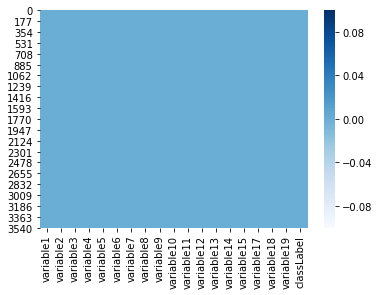

In [873]:
#recheck for missing values
sns.heatmap(df.isnull(),cmap='Blues')


In [874]:
df.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    0
variable19    0
classLabel    0
dtype: int64

# Load validation

In [875]:
df_val=pd.read_csv('binary_classifier_data/validation.csv',delimiter=';')
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [876]:
df_val.shape

(200, 19)

In [877]:
df_val['variable2']=df_val['variable2'].str.replace(',','.')
df_val['variable3']=df_val['variable3'].str.replace(',','.')
df_val['variable8']=df_val['variable8'].str.replace(',','.')


In [878]:
df_val['variable2']=df_val['variable2'].astype('float64')
df_val['variable3']=df_val['variable3'].astype('float64')
df_val['variable8']=df_val['variable8'].astype('float64')

In [879]:
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [880]:
df_val.classLabel.value_counts()
#showing that our data is not balanced 

no.     107
yes.     93
Name: classLabel, dtype: int64

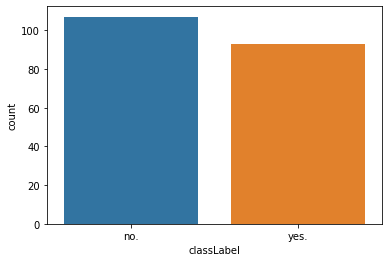

In [881]:
sns.countplot(x='classLabel',data=df_val)
#The records of 'no.'class is so relatevly more in size than that of 'Yes' class, and that completely contrast the case of our train set

  # Check for missing data in validationset

In [882]:
df_val.isnull().sum()

variable1       3
variable2       3
variable3       0
variable4       2
variable5       2
variable6       3
variable7       3
variable8       0
variable9       0
variable10      0
variable11      0
variable12      0
variable13      0
variable14      3
variable15      0
variable17      3
variable18    111
variable19      0
classLabel      0
dtype: int64

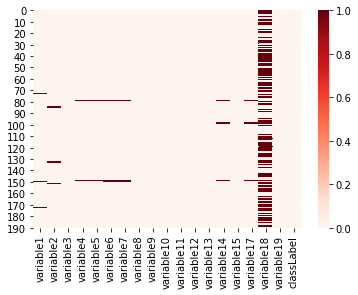

In [883]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [884]:
df_val.fillna(method='pad',axis=0,inplace=True)
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,32.33,0.000750,u,g,e,bb,1.585,t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,23.58,0.000179,u,g,c,v,0.540,f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,36.42,0.000075,y,p,d,v,0.585,f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,18.42,0.001042,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,24.50,0.001334,y,p,aa,v,0.040,f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [885]:
#to make sure that there are not any missing values
df_val.isnull().sum()

variable1     0
variable2     0
variable3     0
variable4     0
variable5     0
variable6     0
variable7     0
variable8     0
variable9     0
variable10    0
variable11    0
variable12    0
variable13    0
variable14    0
variable15    0
variable17    0
variable18    4
variable19    0
classLabel    0
dtype: int64

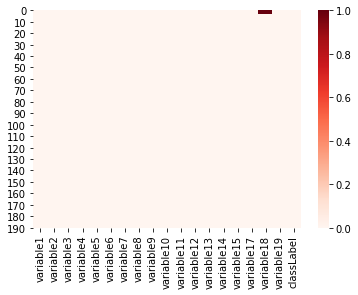

In [886]:
sns.heatmap(df_val.isnull(),cmap='Reds')

In [887]:
#As shown previously that filling data had fail with variable18 as first 4 record still nan
#we can drop them
df_val.dropna(inplace=True)
df.reindex().head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,t,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,t,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,f,0,no.


# Data Preprocessing: Deal With Non_Numerical Data In Train and Validation sets 
### Using Label_Encoder 

In [889]:
cols=df[['variable1', 'variable4', 'variable5', 'variable6' , 'variable7','variable9', 'variable10',
       'variable12', 'variable13', 'variable18','classLabel']]


In [890]:
label_encode=LabelEncoder()
for col in cols:
    label_encode.fit(pd.concat([df[col], df_val[col]], axis=0, sort=False))
    df[col] = label_encode.transform(df[col])
    df_val[col] = label_encode.transform(df_val[col])


## Showing Training Set After Encoding

In [891]:
df.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,0,17.92,0.000054,1,0,2,7,1.750,0,1,1,1,0,80.0,5,800000.0,1,0,0
1,1,16.92,0.000034,2,2,9,7,0.290,0,0,0,0,2,200.0,0,2000000.0,1,0,0
2,1,31.25,0.000112,1,0,6,2,0.000,0,1,1,0,0,96.0,19,960000.0,1,0,0
3,0,48.17,0.000133,1,0,7,6,0.335,0,0,0,0,0,0.0,120,0.0,1,0,0
4,1,32.33,0.000350,1,0,9,7,0.500,0,0,0,1,0,232.0,0,2320000.0,0,0,0


In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3700 non-null int32
variable2     3700 non-null float64
variable3     3700 non-null float64
variable4     3700 non-null int32
variable5     3700 non-null int32
variable6     3700 non-null int32
variable7     3700 non-null int32
variable8     3700 non-null float64
variable9     3700 non-null int32
variable10    3700 non-null int32
variable11    3700 non-null int64
variable12    3700 non-null int32
variable13    3700 non-null int32
variable14    3700 non-null float64
variable15    3700 non-null int64
variable17    3700 non-null float64
variable18    3700 non-null int32
variable19    3700 non-null int64
classLabel    3700 non-null int32
dtypes: float64(5), int32(11), int64(3)
memory usage: 390.4 KB


### Showing Validation Set After Encoding 

In [893]:
#showing data after encoding
df_val.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
4,1,24.50,0.001334,2,2,1,7,0.04,0,0,0,1,0,120.0,475,1200000.0,0,1,0
5,0,39.08,0.000400,1,0,2,7,3.00,0,0,0,0,0,480.0,0,4800000.0,0,0,0
6,1,23.42,0.000100,1,0,2,7,0.50,0,0,0,1,2,280.0,0,2800000.0,0,1,0
7,1,29.58,0.000475,1,0,10,7,2.00,0,1,1,1,0,460.0,68,4600000.0,1,0,0
8,1,27.42,0.001250,1,0,1,0,0.25,0,0,0,1,0,720.0,0,7200000.0,0,1,0


In [894]:
# check that data type had changed
df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 4 to 199
Data columns (total 19 columns):
variable1     196 non-null int32
variable2     196 non-null float64
variable3     196 non-null float64
variable4     196 non-null int32
variable5     196 non-null int32
variable6     196 non-null int32
variable7     196 non-null int32
variable8     196 non-null float64
variable9     196 non-null int32
variable10    196 non-null int32
variable11    196 non-null int64
variable12    196 non-null int32
variable13    196 non-null int32
variable14    196 non-null float64
variable15    196 non-null int64
variable17    196 non-null float64
variable18    196 non-null int32
variable19    196 non-null int64
classLabel    196 non-null int32
dtypes: float64(5), int32(11), int64(3)
memory usage: 22.2 KB


# Divide Data To Features X & classlabel y (Train set)

In [895]:
X=np.array(df.drop(columns=['classLabel']))


In [896]:
y=np.array(df['classLabel'])


# Divide Data To Features X_val & classlabel y_val (Validation set)

In [897]:
X_val=np.array(df_val.drop(columns=['classLabel']))


In [898]:
y_val=np.array(df_val['classLabel'])


# spliting data to training set & testing set(80% training,20% testing)

In [899]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=0)


# To Check Performance 
#### Create function generate_report to check performance by applying appropiate evaluation metrics for our models

In [900]:
def generate_report(y_true,y_pred):
    print("Accuracy Score"+" "+str(accuracy_score(y_true,y_pred)))# not the best to evaluate imbalanced dataset
    print('f1 Score'+' '+str(f1_score(y_true,y_pred)))#using mainly to evaluate imbalance dataset
    print("Recall score" + " "+str(recall_score(y_true,y_pred)))
    print('Precision Score'+" "+str(precision_score(y_true,y_pred)))
    pass
    

In [901]:
def generate_AUC_ROC_Curve(y_true,y_pred):
    '''
    Visualizing ROC CURVE 
    '''
    fpr, tpr, thresholds = roc_curve(y_true, y_pred,pos_label=1)
    plt.plot(fpr,tpr,label="Auc="+' '+str(auc(fpr, tpr)))
    plt.legend(loc=4)
    plt.show()
    pass

# Training Dataset Via ML Models

# Training With xgboosting

In [902]:
xgb_model=xgb.XGBClassifier(objective="binary:logistic",random_state=42)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [903]:
y_pred=xgb_model.predict(x_test)

In [904]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,58,0
1,0,682


In [905]:
generate_report(y_test,y_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


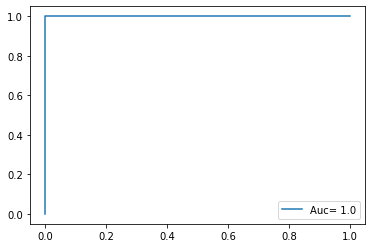

In [906]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [907]:
val_pred=xgb_model.predict(X_val)

In [908]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,51,52
1,47,46


In [909]:
generate_report(y_val,val_pred)

Accuracy Score 0.49489795918367346
f1 Score 0.4816753926701571
Recall score 0.4946236559139785
Precision Score 0.46938775510204084


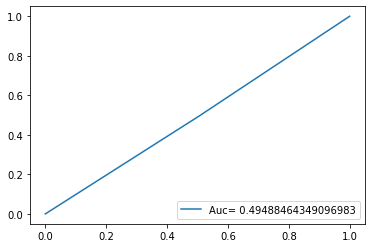

In [910]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Train With Logistic Regression

In [911]:
lr_clf=LogisticRegression(class_weight='balanced')

In [912]:
lr_clf.fit(x_train,y_train)

C:\Users\Konafa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [913]:
y_pred=lr_clf.predict(x_test)

In [914]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,48,10
1,203,479


In [915]:
generate_report(y_test,y_pred)

Accuracy Score 0.7121621621621622
f1 Score 0.8181041844577286
Recall score 0.7023460410557185
Precision Score 0.9795501022494888


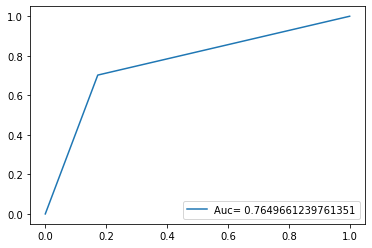

In [916]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [917]:
val_pred=lr_clf.predict(X_val)

In [918]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,82,21
1,29,64


In [919]:
generate_report(y_val,val_pred)

Accuracy Score 0.7448979591836735
f1 Score 0.7191011235955056
Recall score 0.6881720430107527
Precision Score 0.7529411764705882


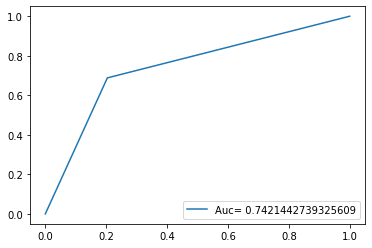

In [920]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Random Forest Classification

In [921]:
clf= RandomForestClassifier(random_state=0)
clf.fit(x_train,y_train)

C:\Users\Konafa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [922]:
y_pred=clf.predict(x_test)

In [923]:

pd.DataFrame(confusion_matrix(y_test,y_pred))




,0,1
0,58,0
1,0,682


In [924]:
generate_report(y_test,y_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


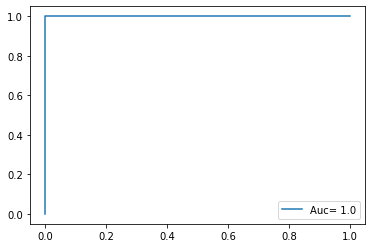

In [925]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [926]:
val_pred=clf.predict(X_val)

In [927]:
pd.DataFrame(confusion_matrix(y_val,val_pred))


,0,1
0,66,37
1,46,47


In [928]:
generate_report(y_val,val_pred)

Accuracy Score 0.576530612244898
f1 Score 0.5310734463276836
Recall score 0.5053763440860215
Precision Score 0.5595238095238095


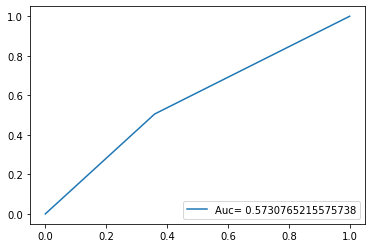

In [929]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Decision Tree

In [930]:
clf_dt=DecisionTreeClassifier()

In [931]:
clf_dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [932]:
dt_pred=clf_dt.predict(x_test)


In [933]:
pd.DataFrame(confusion_matrix(y_test,dt_pred))

,0,1
0,58,0
1,0,682


In [934]:
generate_report(y_test,dt_pred)

Accuracy Score 1.0
f1 Score 1.0
Recall score 1.0
Precision Score 1.0


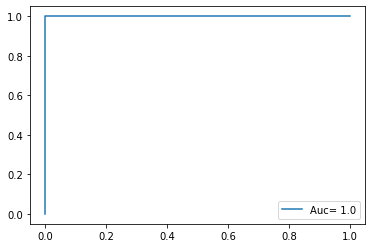

In [935]:
generate_AUC_ROC_Curve(y_test,dt_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [936]:
val_pred=clf_dt.predict(X_val)

In [937]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,51,52
1,47,46


In [938]:
generate_report(y_val,val_pred)

Accuracy Score 0.49489795918367346
f1 Score 0.4816753926701571
Recall score 0.4946236559139785
Precision Score 0.46938775510204084


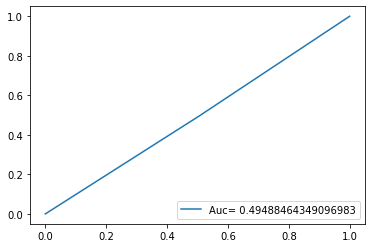

In [939]:
generate_AUC_ROC_Curve(y_val,val_pred)

# K Nearest Neighbors

In [940]:
#using scaling techniques for better accuracy
from sklearn.preprocessing import Binarizer
scaler=Binarizer()
scale_train=scaler.fit_transform(x_train)
scale_test=scaler.transform(x_test)
scale_val=scaler.transform(X_val)

In [941]:
clf_knn= KNeighborsClassifier()

In [942]:
clf_knn.fit(scale_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [943]:
y_pred=clf_knn.predict(scale_test)

In [944]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1
0,50,8
1,0,682


In [945]:
generate_report(y_test,y_pred)

Accuracy Score 0.9891891891891892
f1 Score 0.9941690962099126
Recall score 1.0
Precision Score 0.9884057971014493


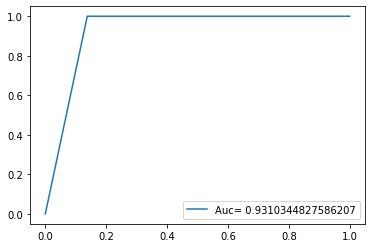

In [946]:
generate_AUC_ROC_Curve(y_test,y_pred)

# Prediction of validation set & Showing performace Measurements(Accuracy,F1_score,Recall_score,Confusion Matrix)

In [947]:
val_pred=clf_knn.predict(scale_val)

In [948]:
pd.DataFrame(confusion_matrix(y_val,val_pred))

,0,1
0,45,58
1,5,88


In [949]:
generate_report(y_val,val_pred)

Accuracy Score 0.6785714285714286
f1 Score 0.7364016736401674
Recall score 0.946236559139785
Precision Score 0.6027397260273972


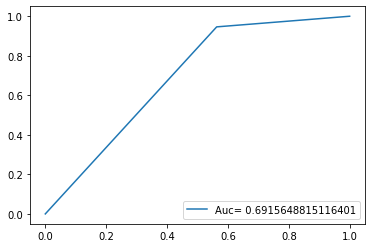

In [950]:
generate_AUC_ROC_Curve(y_val,val_pred)

# Resampling Data to overcome the  imbalaced Dataset Problem 